# Links to Go through
 ### https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
 ###

### Steps to Implement SSD Object Detection
Install Required Libraries:
TensorFlow (or PyTorch if you prefer)
OpenCV
Numpy
Matplotlib
Load a Pre-trained SSD Model:
You can use a pre-trained SSD model provided by TensorFlow or PyTorch. TensorFlow provides an SSD MobileNet V2 model, which is efficient and accurate for many applications.

Load the Model and Labels:
Download the model weights and label map (which maps class IDs to class names).

Prepare the Input Image:
Preprocess the input image to match the input requirements of the SSD model (usually resizing and normalization).

Perform Object Detection:
Run the model on the input image to get the bounding boxes and class predictions.

Visualize the Results:
Draw the bounding boxes and labels on the original image and display or save it.

## Install Libraries

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import matplotlib.pyplot as plt

## load Dataset

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

## Model

In [7]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [11]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000014E9810EA30>

In [12]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List all files in the current working directory
print("Files in the current directory:", os.listdir())


Current Working Directory: C:\Users\hp\Deep_Learning
Files in the current directory: ['.ipynb_checkpoints', '4440930-hd_1920_1080_25fps.mp4', 'boy.jpg', 'frozen_inference_graph.pb', 'GIRL.png', 'labels.txt', 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt', 'Untitled.ipynb']


## Image

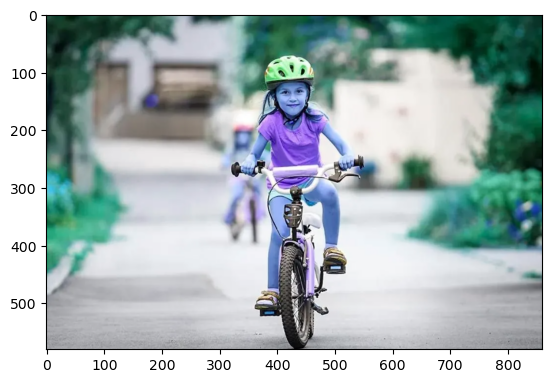

In [13]:
img = cv2.imread('GIRL.PNG')
plt.imshow(img)

In [14]:
ClassIndex, confidence,bbox = model.detect(img, confThreshold= 0.5)

In [15]:
print(ClassIndex)

[1 2 1]


In [16]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0),thickness = 3)

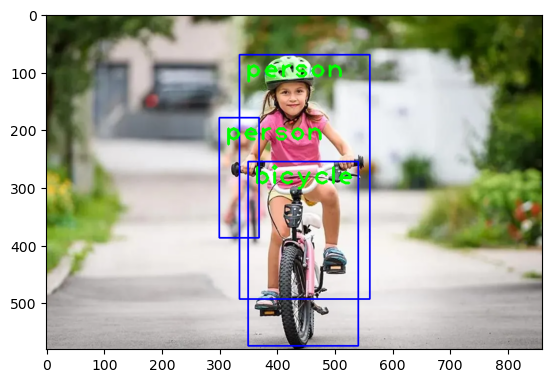

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## VIDEO

In [20]:

cap = cv2.VideoCapture('4440930-hd_1920_1080_25fps.mp4')

if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale= 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
            cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0),thickness = 3)
    cv2.imshow('objection', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyaLLWindows()

[1 3 3]
[1 3 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[3 1 3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[1 3 3 8]
[1 3 3 8]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3]
[1 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3 8]
[1 3 3]
[1 3 3]
[1 3 3 8]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3]
[1 3 3 8 3]
[1 3 3 3 8]
[1 3 3 3 8]
[1 3 3 3]
[1 3 3]
[1 3 8 3]
[1 3 8]
[1 3 4 8]
[1 3 8]
[1 3 8]
[1 3 8 3]
[1 3 8 3]
[1 3 8]
[1 3 8]
[1 3 8 3]
[1 3 8 3]
[3 1 8 3]
[1 3 8 3]
[1 3 8]
[1 3 8]
[1 3 8]
[1 3 8]
[1 3 8]
[1 3 3 8]
[1 3 8]
[1 3 8 3]
[1 3 8]
[1 3 8 4]
[1 8 3 4]
[1 3 8]
[3 1 1]
[3 1 1 1]
[3 1 1 3 4]
[3 1 1 3]
[3 1 1 3 4 1]
[3 1 1 4 3]
[3 1 4 1 3]
[1 3 4 3 8 1 1 4]
[1 4 3 8 3 1]
[1 4 3 8]
[1 3 4 3 1 4]
[1 4 3 3 1 8]
[1 4 3 1 8]
[4 1 3 1]
[1 4 3 1]
[1 4 3 1]
[4 1 3]
[1 4 3]
[1 4 3]
[1 4 3]
[1 3 4]
[1 3 4]
[1 4 3]
[4 1 3]
[3 4 1]
[1 4 3]
[1 4 3]
[4 1 3]
[1 4 3]
[1 3 4]
[3 1 4]
[3 1 4]
[1 3 4]
[1 3 4]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[1 3 1]
[1 3]
[1 3

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


## Web Cam

In [ ]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')

font_scale= 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()
    ClassIndex,confidence,bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            cv2.rectangle(frame, boxes,(255,0,0),2)
            cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0),thickness = 3)
    cv2.imshow('objection', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyaLLWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
